In [45]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('Valorant.sqlite')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Get a list of all tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

In [46]:
# store each table column's name in a list
tables_column_names = []
# Iterate through each table and print its structure
for table in tables:
    table_name = table[0]
    print(f"Table: {table_name}")
    
    # Execute a query to retrieve the structure of the table
    cursor.execute(f"PRAGMA table_info({table_name})")
    columns = cursor.fetchall()
    
    table_column_names = []

    # Print column names and their data types
    for column in columns:
        print(f"  Column: {column[1]}, Type: {column[2]}")
        table_column_names.append(column[1])

    tables_column_names.append(table_column_names)


    print()  # Add a newline between tables

matches_column_names = tables_column_names[0]
games_column_names = tables_column_names[1]
game_rounds_column_names = tables_column_names[2]
game_scoreboard_column_names = tables_column_names[3]


Table: Matches
  Column: MatchID, Type: TEXT
  Column: Date, Type: TEXT
  Column: Patch, Type: TEXT
  Column: EventID, Type: TEXT
  Column: EventName, Type: TEXT
  Column: EventStage, Type: TEXT
  Column: Team1ID, Type: INTEGER
  Column: Team2ID, Type: INTEGER
  Column: Team1, Type: TEXT
  Column: Team2, Type: TEXT
  Column: Team1_MapScore, Type: INTEGER
  Column: Team2_MapScore, Type: INTEGER

Table: Games
  Column: GameID, Type: TEXT
  Column: MatchID, Type: TEXT
  Column: Map, Type: TEXT
  Column: Team1ID, Type: INTEGER
  Column: Team2ID, Type: INTEGER
  Column: Team1, Type: TEXT
  Column: Team2, Type: TEXT
  Column: Winner, Type: TEXT
  Column: Team1_TotalRounds, Type: INTEGER
  Column: Team2_TotalRounds, Type: INTEGER
  Column: Team1_SideFirstHalf, Type: TEXT
  Column: Team2_SideFirstHalf, Type: TEXT
  Column: Team1_RoundsFirstHalf, Type: INTEGER
  Column: Team1_RoundsSecondtHalf, Type: INTEGER
  Column: Team1_RoundsOT, Type: INTEGER
  Column: Team2_RoundsFirstHalf, Type: INTEGER


In [47]:
#4 tables in the database are:Matches, Games, Game_Rounds, Game_Scoreboard
# Define variables to store data from each table
matches_data = None
games_data = None
game_rounds_data = None
game_scoreboard_data = None

# Fetch data from the 'Matches' table
cursor.execute("SELECT * FROM Matches")
matches_data = cursor.fetchall()

# Fetch data from the 'Games' table
cursor.execute("SELECT * FROM Games")
games_data = cursor.fetchall()

# Fetch data from the 'Game_Rounds' table
cursor.execute("SELECT * FROM Game_Rounds")
game_rounds_data = cursor.fetchall()

# Fetch data from the 'Game_Scoreboard' table
cursor.execute("SELECT * FROM Game_Scoreboard")
game_scoreboard_data = cursor.fetchall()


In [48]:
#print the first 5 rows of each table
print("Matches Table:")
for row in matches_data[:5]:
    print(row)
print("--------------------")

print("Games Table:")
for row in games_data[:5]:
    print(row)
print("--------------------")

print("Game_Rounds Table:")
for row in game_rounds_data[:5]:
    print(row)
print("--------------------")

print("Game_Scoreboard Table:")
for row in game_scoreboard_data[:5]:
    print(row)
print("--------------------")


Matches Table:
('62393', '2022-01-08 15:30:00', 'Patch 3.12', '826', 'Nerd Street Gamers Winter Championship - Regional LAN Philadelphia', 'Group Stage: Decider (A)', 6903, 6020, 'Booster Seat Gaming', 'Pho Real', 2, 1)
('62403', '2022-01-08 15:30:00', 'Patch 3.12', '826', 'Nerd Street Gamers Winter Championship - Regional LAN Philadelphia', 'Group Stage: Decider (C)', 7046, 7047, "Bjor's Kittens", 'Mugiwara', 2, 0)
('62391', '2022-01-08 12:30:00', 'Patch 3.12', '826', 'Nerd Street Gamers Winter Championship - Regional LAN Philadelphia', "Group Stage: Winner's (A)", 6461, 6903, 'Akrew', 'Booster Seat Gaming', 2, 1)
('62396', '2022-01-08 12:30:00', 'Patch 3.12', '826', 'Nerd Street Gamers Winter Championship - Regional LAN Philadelphia', "Group Stage: Winner's (B)", 6164, 7043, 'Radiance', 'sameROFLMAO', 2, 0)
('62401', '2022-01-08 12:30:00', 'Patch 3.12', '826', 'Nerd Street Gamers Winter Championship - Regional LAN Philadelphia', "Group Stage: Winner's (C)", 7045, 7046, 'Salt and Vine

In [49]:
# Define function to drop specific columns from the data and drop columns names from the columns_names list
def drop_columns(data, columns_names, columns_to_drop_indices_list):
    # Convert list of column names to a set for faster lookup
    columns_to_drop_set = set(columns_to_drop_indices_list)
    
    #drop column names from the columns_names list
    # columns_names = [column for column in columns_names if column not in columns_to_drop]
    #but the columns_to_drop is a list of column indices, so we can't use the above code
    columns_names = [column for index, column in enumerate(columns_names) if index not in columns_to_drop_indices_list]

    # Iterate through each row in the data and drop specified columns
    cleaned_data = []
    for row in data:
        cleaned_row = tuple(value for index, value in enumerate(row) if index not in columns_to_drop_set)
        cleaned_data.append(cleaned_row)
    
    return cleaned_data, columns_names


# Drop specific columns from each table's data
#drop [Date, Patch, EventID, EventName, EventStage] columns from the Matches table
matches_data, matches_column_names = drop_columns(matches_data, matches_column_names, [1, 2, 3, 4, 5])  # Assuming column indices for columns to drop
# games_data = drop_columns(games_data, ['column1_to_drop', 'column2_to_drop', ...])
# game_rounds_data = drop_columns(game_rounds_data, ['column1_to_drop', 'column2_to_drop', ...])
# game_scoreboard_data = drop_columns(game_scoreboard_data, ['column1_to_drop', 'column2_to_drop', ...])

In [50]:
#print the first 5 rows of each table after dropping columns and column names
print("Matches Table:")
print(matches_column_names)
for row in matches_data[:5]:
    print(row)
print("--------------------")

Matches Table:
['MatchID', 'Team1ID', 'Team2ID', 'Team1', 'Team2', 'Team1_MapScore', 'Team2_MapScore']
('62393', 6903, 6020, 'Booster Seat Gaming', 'Pho Real', 2, 1)
('62403', 7046, 7047, "Bjor's Kittens", 'Mugiwara', 2, 0)
('62391', 6461, 6903, 'Akrew', 'Booster Seat Gaming', 2, 1)
('62396', 6164, 7043, 'Radiance', 'sameROFLMAO', 2, 0)
('62401', 7045, 7046, 'Salt and Vinegar', "Bjor's Kittens", 2, 0)
--------------------


In [51]:
from pyspark import SparkContext

# Create a SparkContext
sc = SparkContext("local", "CustomMapReduceExample")


In [52]:
# store the ACS and Agent from game_scoreboard_data using the game_scoreboard_column_names to know the index of the 2 columns in 2 separate lists
acs = []
agents = []
for row in game_scoreboard_data:
    acs.append(row[game_scoreboard_column_names.index('ACS')])
    agents.append(row[game_scoreboard_column_names.index('Agent')])

#print the unique agents
unique_agents = set(agents)
print(unique_agents)

# Create an RDD from the ACS list
acs_rdd = sc.parallelize(acs)

# Create an RDD from the Agents list
agents_rdd = sc.parallelize(agents)

{'jett', 'raze', 'viper', 'kayo', 'cypher', '', 'phoenix', 'reyna', 'astra', 'sova', 'sage', 'breach', 'omen', 'yoru', 'skye', 'chamber', 'killjoy', 'brimstone'}


In [53]:
import threading
from queue import Queue

# Define the map function
def my_map_func(agents_rdd, acs_rdd, queue):
    mapped_output = []
    for agent, ac in zip(agents_rdd.collect(), acs_rdd.collect()):
        if not agent or not ac:
            continue
        mapped_output.append({agent: ac})
    queue.put(mapped_output)

# Define the reduce function
def my_reduce_func(mapped_output, queue):
    """
    Reduces the mapped output to calculate the average acs for each unique agent.

    Args:
    - mapped_output: List of dictionaries mapping agents to their ACS values.
    - queue: Queue for putting the reduced output.

    Returns:
    - None
    """
    agent_totals = {}
    agent_counts = {}
    # Iterate over the mapped output to calculate totals and counts for each agent
    for mapping in mapped_output:
        for agent, acs in mapping.items():
            agent_totals[agent] = agent_totals.get(agent, 0) + acs
            agent_counts[agent] = agent_counts.get(agent, 0) + 1
    # Calculate average ACS for each agent
    reduced_output = {}
    for agent in agent_totals:
        avg_acs = agent_totals[agent] / agent_counts[agent]
        reduced_output[agent] = avg_acs
    queue.put(reduced_output)


# Input data
agents_list = agents_rdd.collect()

acs_list = acs_rdd.collect()

# Define the number of partitions
num_partitions = 4

# Divide the lists into partitions
agents_partitions = [agents_list[i::num_partitions] for i in range(num_partitions)]
acs_partitions = [acs_list[i::num_partitions] for i in range(num_partitions)]

# Create RDDs from partitioned lists
agents_rdds = [sc.parallelize(partition) for partition in agents_partitions]
acs_rdds = [sc.parallelize(partition) for partition in acs_partitions]

# Create a queue for communication between threads
queue = Queue()

# Start map threads
map_threads = []
for i in range(num_partitions):
    map_thread = threading.Thread(target=my_map_func, args=(agents_rdds[i], acs_rdds[i], queue))
    map_thread.start()
    map_threads.append(map_thread)


# Join map threads
for map_thread in map_threads:
    map_thread.join()

# Get mapped output from queue
mapped_output = []
for _ in range(num_partitions):
    mapped_output.extend(queue.get())

# Start reduce thread
reduce_thread = threading.Thread(target=my_reduce_func, args=(mapped_output, queue))
reduce_thread.start()

# Join reduce thread
reduce_thread.join()

# Get reduced output from queue
reduced_output = queue.get()

# Print reduced output
print("\nReduced Output:")
print(reduced_output)




Reduced Output:
{'chamber': 211.49484536082474, 'astra': 187.48242067867207, 'viper': 194.9450477561167, 'sage': 188.38698630136986, 'sova': 196.94910733491074, 'jett': 230.055984987266, 'skye': 188.23128628169874, 'reyna': 230.33101375929147, 'killjoy': 198.35060449050087, 'raze': 235.2109096544243, 'cypher': 187.4515158354021, 'kayo': 188.97383177570094, 'brimstone': 189.9135152910227, 'breach': 174.44559151785714, 'phoenix': 221.6851851851852, 'omen': 188.6640650406504, 'yoru': 213.0344827586207}


In [57]:
# Sort agents by their average ACS values
sorted_agents = sorted(reduced_output.items(), key=lambda x: x[1], reverse=True)

# Print sorted list
print("Agents sorted by average ACS:")
for agent, avg_acs in sorted_agents:
    print(f"{agent}: {avg_acs}")

Agents sorted by average ACS:
raze: 235.2109096544243
reyna: 230.33101375929147
jett: 230.055984987266
phoenix: 221.6851851851852
yoru: 213.0344827586207
chamber: 211.49484536082474
killjoy: 198.35060449050087
sova: 196.94910733491074
viper: 194.9450477561167
brimstone: 189.9135152910227
kayo: 188.97383177570094
omen: 188.6640650406504
sage: 188.38698630136986
skye: 188.23128628169874
astra: 187.48242067867207
cypher: 187.4515158354021
breach: 174.44559151785714


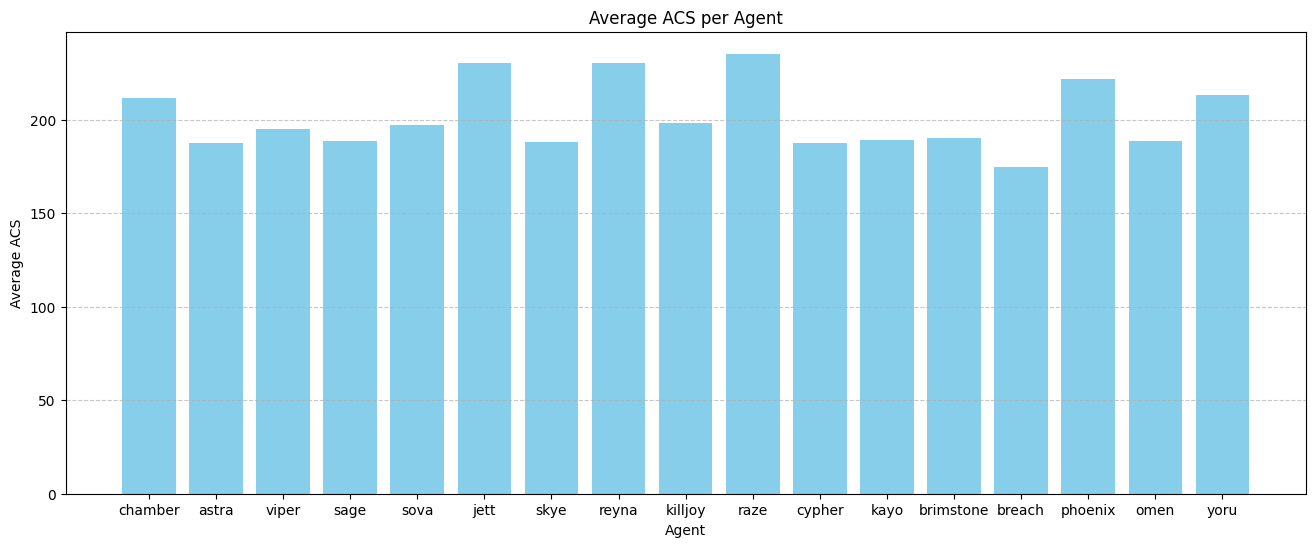

In [54]:
#visualize the data
import matplotlib.pyplot as plt

# Extract agent names and average ACS values
agents = list(reduced_output.keys())
avg_acs_values = list(reduced_output.values())

# Create bar chart
plt.figure(figsize=(16, 6))
plt.bar(agents, avg_acs_values, color='skyblue')
plt.xlabel('Agent')
plt.ylabel('Average ACS')
plt.title('Average ACS per Agent')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [55]:
# Close the cursor and connection
sc.stop()
cursor.close()
conn.close()
